# Predicting the Stock Market

In [2]:
import pandas as pd
from datetime import datetime
import numpy as np
# import yfinance as yf

spy = pd.read_csv('SPY2.csv')
spy['Date'] = pd.to_datetime(spy['Date'])
spy = spy.sort_values('Date', ascending=True)
spy.tail(20)

,Date,Open,High,Low,Close,Adj Close,Volume
7431,2022-08-03,410.299988,415.679993,410.000000,414.450012,414.450012,67820600
7432,2022-08-04,414.369995,415.089996,412.440002,414.170013,414.170013,45656600
7433,2022-08-05,409.660004,414.149994,409.600006,413.470001,413.470001,56755600
7434,2022-08-08,415.250000,417.619995,411.829987,412.989990,412.989990,53886100
7435,2022-08-09,412.220001,412.750000,410.220001,411.350006,411.350006,44931800
7436,2022-08-10,418.779999,420.140015,416.720001,419.989990,419.989990,68665700
7437,2022-08-11,422.989990,424.950012,419.209991,419.989990,419.989990,59489700
7438,2022-08-12,422.029999,427.209991,421.029999,427.100006,427.100006,61644600
7439,2022-08-15,424.769989,429.410004,424.709991,428.859985,428.859985,54048300
7440,2022-08-16,427.730011,431.730011,426.880005,429.700012,429.700012,59289000


Creating the tommorow close price column as our target.

In [3]:
spy['Tommorow high'] = spy['High'].shift(-1)
spy['Tommorow low'] = spy['Low'].shift(-1)
spy.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Tommorow high,Tommorow low
7446,2022-08-24,412.109985,415.109985,411.390015,413.670013,413.670013,49177800,419.559998,414.089996
7447,2022-08-25,415.239990,419.559998,414.089996,419.510010,419.510010,50942300,419.959991,405.250000
7448,2022-08-26,419.390015,419.959991,405.250000,405.309998,405.309998,102896000,405.839996,401.200012
7449,2022-08-29,402.200012,405.839996,401.200012,402.630005,402.630005,65370800,404.100006,396.000000
7450,2022-08-30,403.850006,404.100006,396.000000,398.209991,398.209991,85460800,NaN,NaN


In [4]:
spy.iloc[-1,7] = spy.iloc[-2,2]
spy.iloc[-1,8] = spy.iloc[-2,3]
spy.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Tommorow high,Tommorow low
7446,2022-08-24,412.109985,415.109985,411.390015,413.670013,413.670013,49177800,419.559998,414.089996
7447,2022-08-25,415.239990,419.559998,414.089996,419.510010,419.510010,50942300,419.959991,405.250000
7448,2022-08-26,419.390015,419.959991,405.250000,405.309998,405.309998,102896000,405.839996,401.200012
7449,2022-08-29,402.200012,405.839996,401.200012,402.630005,402.630005,65370800,404.100006,396.000000
7450,2022-08-30,403.850006,404.100006,396.000000,398.209991,398.209991,85460800,405.839996,401.200012


In [5]:
spy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7451 entries, 0 to 7450
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           7451 non-null   datetime64[ns]
 1   Open           7451 non-null   float64       
 2   High           7451 non-null   float64       
 3   Low            7451 non-null   float64       
 4   Close          7451 non-null   float64       
 5   Adj Close      7451 non-null   float64       
 6   Volume         7451 non-null   int64         
 7   Tommorow high  7451 non-null   float64       
 8   Tommorow low   7451 non-null   float64       
dtypes: datetime64[ns](1), float64(7), int64(1)
memory usage: 582.1 KB


## Generating Technical Indicators

We will use indicators from the "ta" library.

In [6]:
import ta
from ta import add_all_ta_features
from ta.utils import dropna

#spy = dropna(spy)

spy = add_all_ta_features(
    spy, open="Open", high="High", low="Low", close="Close", volume="Volume", fillna=True)

print(spy.info())

C:\Users\tmrse\anaconda3\lib\site-packages\ta\trend.py:769: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
C:\Users\tmrse\anaconda3\lib\site-packages\ta\trend.py:774: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7451 entries, 0 to 7450
Data columns (total 95 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       7451 non-null   datetime64[ns]
 1   Open                       7451 non-null   float64       
 2   High                       7451 non-null   float64       
 3   Low                        7451 non-null   float64       
 4   Close                      7451 non-null   float64       
 5   Adj Close                  7451 non-null   float64       
 6   Volume                     7451 non-null   int64         
 7   Tommorow high              7451 non-null   float64       
 8   Tommorow low               7451 non-null   float64       
 9   volume_adi                 7451 non-null   float64       
 10  volume_obv                 7451 non-null   int64         
 11  volume_cmf                 7451 non-null   float64       
 12  volume

In [7]:
spy.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Tommorow high,Tommorow low,volume_adi,...,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,momentum_pvo,momentum_pvo_signal,momentum_pvo_hist,momentum_kama,others_dr,others_dlr,others_cr
7446,2022-08-24,412.109985,415.109985,411.390015,413.670013,413.670013,49177800,419.559998,414.089996,3.971792e+10,...,1.331068,1.780697,-0.449629,-6.679539,-6.887981,0.208442,420.973055,0.320118,0.319607,841.496473
7447,2022-08-25,415.239990,419.559998,414.089996,419.510010,419.510010,50942300,419.959991,405.250000,3.976793e+10,...,1.263327,1.677223,-0.413896,-7.314585,-6.973301,-0.341283,420.965388,1.411753,1.401880,854.788074
7448,2022-08-26,419.390015,419.959991,405.250000,405.309998,405.309998,102896000,405.839996,401.200012,3.966587e+10,...,0.924091,1.526597,-0.602505,-0.961919,-5.771025,4.809106,418.889433,-3.384904,-3.443519,822.469412
7449,2022-08-29,402.200012,405.839996,401.200012,402.630005,402.630005,65370800,404.100006,396.000000,3.964080e+10,...,0.595617,1.340401,-0.744784,-0.815292,-4.779878,3.964587,416.051529,-0.661221,-0.663416,816.369855
7450,2022-08-30,403.850006,404.100006,396.000000,398.209991,398.209991,85460800,405.839996,401.200012,3.960197e+10,...,0.245142,1.121349,-0.876207,1.720939,-3.479715,5.200654,412.322417,-1.097786,-1.103856,806.310079


## Splitting the data

In [8]:
train = spy[spy['Date'] < datetime(year=2020, month=1, day=1)]
test = spy[spy['Date'] >= datetime(year=2020, month=1, day=1)]

## Making Predictions

### Linear Regression

Mean Absolute Error will be our error metric since it is more intuitive.

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

columns = spy.columns.drop(['Date', 'Tommorow high', 'Tommorow low'])

model = LinearRegression()
model.fit(train[columns], train['Tommorow high'])
predictions = model.predict(test[columns])
mae = mean_absolute_error(test['Tommorow high'], predictions)
mae

2.499554016054489

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

model = LinearRegression()
model.fit(train[columns], train['Tommorow low'])
predictions = model.predict(test[columns])
mae = mean_absolute_error(test['Tommorow low'], predictions)
mae

3.0667680768335464

### Random Forest

In [11]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=1, n_estimators=100)
model.fit(train[columns], train['Tommorow high'])
predictions = model.predict(test[columns])
mae = mean_absolute_error(test['Tommorow high'], predictions)
mae

70.99769585733232

In [12]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=1, n_estimators=100)
model.fit(train[columns], train['Tommorow low'])
predictions = model.predict(test[columns])
mae = mean_absolute_error(test['Tommorow low'], predictions)
mae

69.11946857260821

## Decision Tree

In [13]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(random_state=1, min_samples_leaf=6, max_depth=4)
model.fit(train[columns], train['Tommorow high'])
predictions = model.predict(test[columns])
mae = mean_absolute_error(test['Tommorow high'], predictions)
mae

84.99248419797532

In [14]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(random_state=1, min_samples_leaf=6, max_depth=4)
model.fit(train[columns], train['Tommorow low'])
predictions = model.predict(test[columns])
mae = mean_absolute_error(test['Tommorow low'], predictions)
mae

81.93300832286194

## Gradient Boosting Regressor

In [15]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor(random_state=1)
model.fit(train[columns], train['Tommorow high'])
predictions = model.predict(test[columns])
mae = mean_absolute_error(test['Tommorow high'], predictions)
mae

71.3710043854274

In [16]:
model = DecisionTreeRegressor(random_state=1)
model.fit(train[columns], train['Tommorow low'])
predictions = model.predict(test[columns])
mae = mean_absolute_error(test['Tommorow low'], predictions)
mae

68.31531981371086

## K Nearest Neighbors

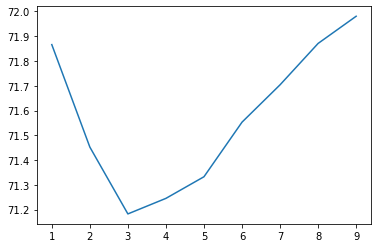

In [22]:
from sklearn.neighbors import KNeighborsRegressor

%matplotlib inline
import matplotlib.pyplot as plt

def knn(k):
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(train[columns], train['Tommorow high'])
    predictions = model.predict(test[columns])
    mae = mean_absolute_error(test['Tommorow high'], predictions)
    return mae

k_values = list(range(1,10))
k_accuracies = []
for k in k_values:
    k_accuracies.append(knn(k))
    
plt.plot(k_values, k_accuracies)


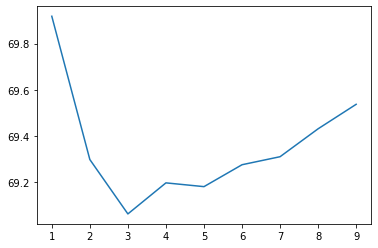

In [23]:
def knn(k):
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(train[columns], train['Tommorow low'])
    predictions = model.predict(test[columns])
    mae = mean_absolute_error(test['Tommorow low'], predictions)
    return mae

k_values = list(range(1,10))
k_accuracies = []
for k in k_values:
    k_accuracies.append(knn(k))
    
plt.plot(k_values, k_accuracies)

## Neural Networks

C:\Users\tmrse\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[5302.8382834225595, 13360651.958688108, 423865.6185479873, 2299410.707264964, 2524303.653476983, 86681215.34649892]


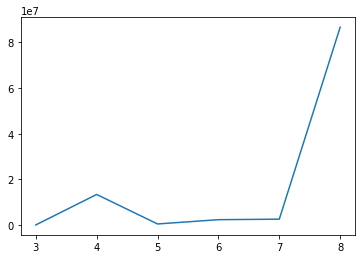

In [27]:
from sklearn.neural_network import MLPRegressor

def nn(n):
    model = MLPRegressor(hidden_layer_sizes=(n,n,n))
    model.fit(train[columns], train['Tommorow high'])
    predictions = model.predict(test[columns])
    mae = mean_absolute_error(test['Tommorow high'], predictions)
    return mae

n_values = list(range(3,9))
n_accuracies = []
for n in n_values:
    n_accuracies.append(nn(2**n))
    
plt.plot(n_values, n_accuracies)
print(n_accuracies)


C:\Users\tmrse\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\tmrse\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[165335.9953715275, 1487066.2019786353, 1667524.68338759, 1682035.968644544, 260896.6626861357, 3807153.450815576]


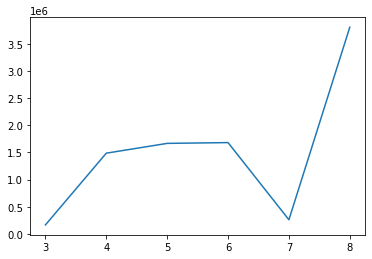

In [26]:
def nn(n):
    model = MLPRegressor(hidden_layer_sizes=(n,))
    model.fit(train[columns], train['Tommorow low'])
    predictions = model.predict(test[columns])
    mae = mean_absolute_error(test['Tommorow low'], predictions)
    return mae

n_values = list(range(3,9))
n_accuracies = []
for n in n_values:
    n_accuracies.append(nn(2**n))
    
plt.plot(n_values, n_accuracies)
print(n_accuracies)